In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd


In [3]:
# Modify path to find code directory:
import sys
sys.path.append('../code/')


In [4]:
from structures import *
from datasets import Dataset


In [5]:
# Build agents from recipe:
Agent.reset()  # Reset IDs to zero.
ds = Dataset(seed=183)
ds.recipe2()
table = ds.build_agent_table()
display(table.head())

# Build environment:
ds.build_environment(
    transition_model = 'reachable',  # Set defaults models.
    policy_model = 'random_policy',  # (Can override them when calling build_* directly.)
    intervention_size=100,
)
env = ds.env
print(env)


,agent_id,workplace_id,specialty_id,inner_circle,inner_circle_size,outer_circle,outer_circle_size,informed_init,receptivity,persuasiveness
0,0,1,2,2,1,1;2;3,3,0,0.04,0.19
1,1,1,2,0,1,1,1,0,0.12,0.29
2,2,1,2,2,1,0;3,2,0,0.14,0.15
3,3,1,1,2,1,1;3,2,0,0.03,0.39
4,4,2,1,7,1,3;8,2,0,0.10,0.33


<Environment with 0/9 informed agents>


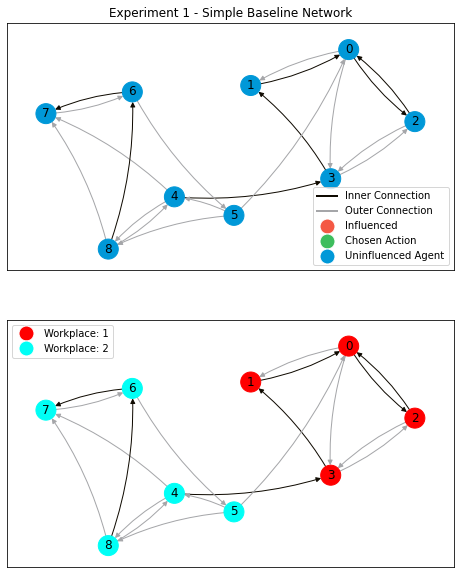

In [6]:
fig, axs = plt.subplots(2,1, figsize=(8,10))
ax0 = env.plot_network_graph(iterations=15, labels=False, colors="influence", rebuild=True, legend=True, seed=183, ax = axs[0])
ax1 = env.plot_network_graph(iterations=15, labels=False, colors="workplace", rebuild=True, legend=True, seed=183, ax = axs[1])
ax0.set_title("Experiment 1 - Simple Baseline Network")
plt.show()

In [7]:
# Perform policy iteration:
env.build_transition_matrix(model='reachable', n_selected=1)
#sub_env.build_transition_matrix(model='exhaustive_fast')
env.build_policy(model='policy_iteration')

# Query optimal policy:
test_state = State(env,vector=[False,False,False,False,False,False,False,False,False])
env.policy.get_action(test_state)

array([False, False, False, False,  True, False, False, False, False])

In [61]:
test_state = State(env,vector=[False,False,False,False,False,False,False,False,False])
env.policy.get_action(test_state)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# Build sub-problem with agents from workplace #2:
agents = env.get_workplace(workplace_id=1)
sub_env = env.build_sub_problem(agents)
print(sub_env)


In [ ]:
# Build random useful policy (does not require transition matrix):
sub_env.build_policy(model='random_useful_policy', n_selected=1)
test_state = State(sub_env,vector=[True,True,True,True,True,True,False,False,False,False])
sub_env.policy.get_action(test_state)


In [ ]:
# Build random policy (uses caching, so faster to access than random_useful_policy):
sub_env.build_policy(model='random_policy')
sub_env.policy.get_action()


In [ ]:
# Perform policy iteration:
sub_env.build_transition_matrix(model='reachable')
#sub_env.build_transition_matrix(model='exhaustive_fast')
sub_env.build_policy(model='policy_iteration')
# Query optimal policy:
test_state = State(sub_env,vector=[True,True,True,True,True,True,False,False,False,False])
sub_env.policy.get_action(test_state)


In [ ]:
# Examing action space:
sub_env.policy.action_space
